In [ ]:
# Setup
import numpy as np

from sklearn import datasets
from sklearn import neighbors

import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
n_samples, n_features = iris.data.shape

print((n_samples, n_features))

(150, 4)


In [ ]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [ ]:
print(iris.target.shape)

(150,)


In [ ]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


<ipython-input-7-ae924c731cc5>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


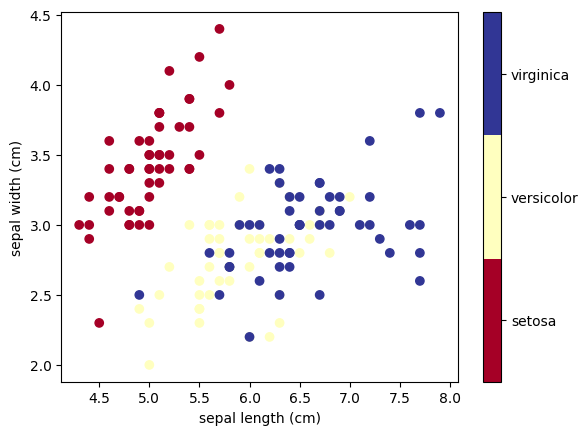

In [ ]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [ ]:
# Classification model
# We use K-nearest neighbors (k-NN), which is one of the simplest learning strategies:
# given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.
# Let’s try it out on our iris classification problem:
  # Prepare the data
  # Initialize the model object
  # fit the model to the data
  # Make a prediction

In [ ]:
X, y = iris.data, iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors=5)

clf.fit(X, y)

KNeighborsClassifier()

In [ ]:
result = clf.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


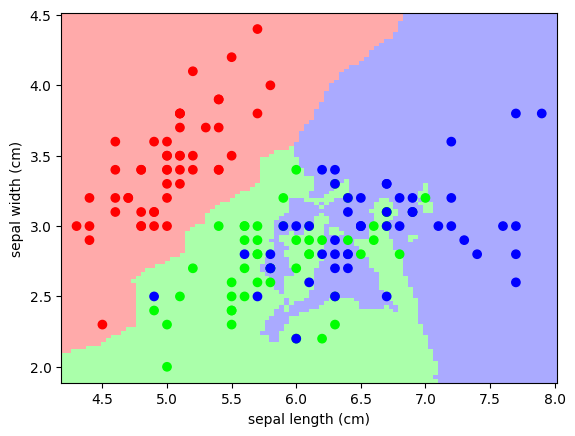

In [ ]:
# HIDE CODE

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')

plot_iris_knn()